In [9]:
%matplotlib inline
import numpy
import scipy
import IPython.display as ipd
import matplotlib.pyplot as plt 
import librosa, librosa.display

Sound is simply air vibrating. Sound vibrates through the air as longitudinal waves, i.e. the oscillations are parallel to the direction of propagation.
**Audio** refers to the production, transmission, or reception of sounds that are audible by humans. An **audio signal** is a representation of sound that represents the fluctuation in air pressure caused by the vibration as a function of time. 

## Waveforms and the Time Domain

The basic representation of an audio signal is in the **time domain**. 

Let's listen to a file:

In [2]:
x, sr = librosa.load('wav/train/6 by 1_20_12.wav')
ipd.Audio(x, rate=sr)

The change in air pressure at a certain time is graphically represented by a **pressure-time plot**, or simply **waveform**.

To plot a waveform, use [`librosa.display.waveplot`](http://bmcfee.github.io/librosa/generated/librosa.display.waveplot.html):

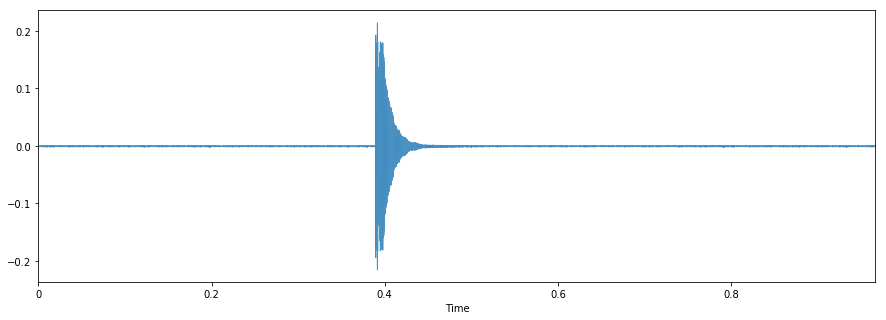

In [3]:
plt.figure(figsize=(15, 5))
librosa.display.waveplot(x, sr, alpha=0.8)

Digital computers can only capture this data at discrete moments in time. The rate at which a computer captures audio data is called the **sampling frequency** (often abbreviated `fs`) or **sampling rate** (often abbreviated `sr`). For this workshop, we will mostly work with a sampling frequency of 44100 Hz, the sampling rate of CD recordings.

## Timbre: Temporal Indicators

**Timbre** is the quality of sound that distinguishes the tone of different instruments and voices even if the sounds have the same pitch and loudness.

One characteristic of timbre is its temporal evolution. The **envelope** of a signal is a smooth curve that approximates the amplitude extremes of a waveform over time.

Envelopes are often modeled by the **ADSR model** ([Wikipedia](https://en.wikipedia.org/wiki/Synthesizer#Attack_Decay_Sustain_Release_.28ADSR.29_envelope)) which describes four phases of a sound: attack, decay, sustain, release. 

During the attack phase, the sound builds up, usually with noise-like components over a broad frequency range. Such a noise-like short-duration sound at the start of a sound is often called a transient.

During the decay phase, the sound stabilizes and reaches a steady periodic pattern.

During the sustain phase, the energy remains fairly constant.

During the release phase, the sound fades away.

The ADSR model is a simplification and does not necessarily model the amplitude envelopes of all sounds.

![Chart of Pre-trained Networks](images/Timbre.png)

## Timbre: Spectral Indicators

Another property used to characterize timbre is the existence of partials and their relative strengths. **Partials** are the dominant frequencies in a musical tone with the lowest partial being the **fundamental frequency**.

The partials of a sound are visualized with a **spectrogram**. A spectrogram shows the intensity of frequency components over time. (See [Fourier Transform](fourier_transform.html) and [Short-Time Fourier Transform](stft.html) for more.)

### Pure Tone

Let's synthesize a pure tone at 432 Hz:

In [4]:
T = 2.0 # seconds
f0 = 432.0
sr = 22050
t = numpy.linspace(0, T, int(T*sr), endpoint=False) # time variable
x = 0.1*numpy.sin(2*numpy.pi*f0*t)
ipd.Audio(x, rate=sr)

Display the spectrum of the pure tone:

Text(0.5,0,'Frequency (Hz)')

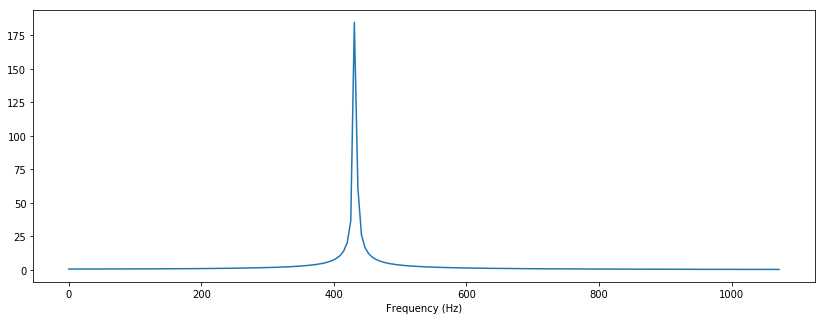

In [5]:
X = scipy.fft(x[:4096])
X_mag = numpy.absolute(X)        # spectral magnitude
f = numpy.linspace(0, sr, 4096)  # frequency variable
plt.figure(figsize=(14, 5))
plt.plot(f[:200], X_mag[:200]) # magnitude spectrum
plt.xlabel('Frequency (Hz)')

### Tap Tone

In [16]:
x, sr = librosa.load('wav/train/6 by 1_20_12.wav')
ipd.Audio(x, rate=sr)

In [17]:
print(x.shape)

(20177,)


Display the spectrum of the oboe:

Text(0.5,0,'Frequency (Hz)')

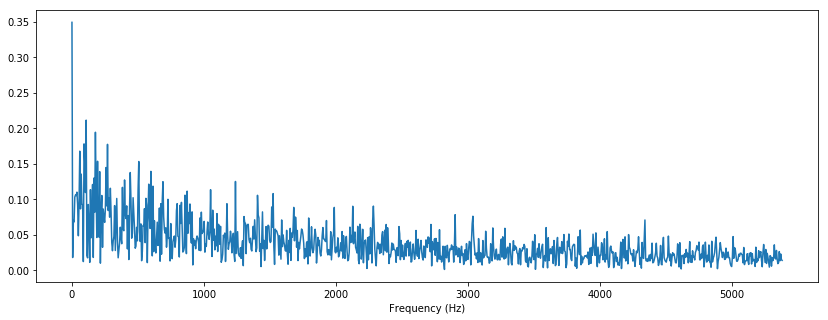

In [18]:
X = scipy.fft(x[1000:9000])
X_mag = numpy.absolute(X)
plt.figure(figsize=(14, 5))
plt.plot(f[:1000], X_mag[:1000]) # magnitude spectrum
plt.xlabel('Frequency (Hz)')